In [1]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

<IPython.core.display.Javascript object>

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
df.shape

(96, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [16]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<IPython.core.display.Javascript object>

<AxesSubplot: >

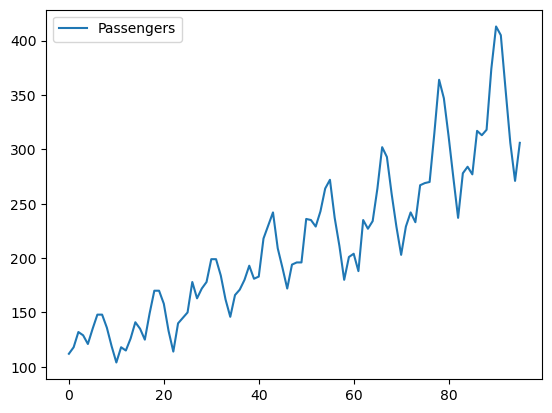

In [22]:
sns.lineplot(df)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Passengers', ylabel='Density'>

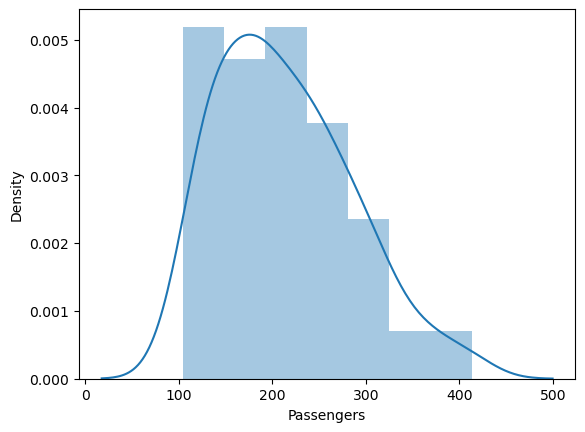

In [25]:
sns.distplot(df.Passengers)

<AxesSubplot: ylabel='Density'>

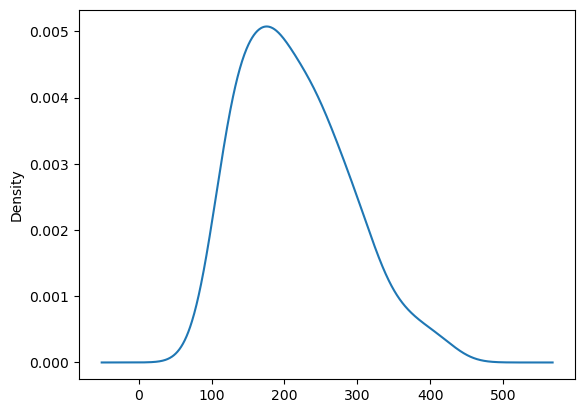

In [26]:
df.Passengers.plot(kind='kde')

In [29]:
df['year']=df['Month'].dt.strftime('%Y')
df['month'] = df['Month'].dt.strftime('%b')
df

,Month,Passengers,year,month
0,1995-01-01,112,1995,Jan
1,1995-02-01,118,1995,Feb
2,1995-03-01,132,1995,Mar
3,1995-04-01,129,1995,Apr
4,1995-05-01,121,1995,May
...,...,...,...,...
91,2002-08-01,405,2002,Aug
92,2002-09-01,355,2002,Sep
93,2002-10-01,306,2002,Oct
94,2002-11-01,271,2002,Nov


In [30]:
df_pivot = pd.pivot_table(index='month',data=df,columns='year',values='Passengers')
df_pivot

<IPython.core.display.Javascript object>

year,1995,1996,1997,1998,1999,2000,2001,2002
month,,,,,,,,
Apr,129,135,163,181,235,227,269,313
Aug,148,170,199,242,272,293,347,405
Dec,118,140,166,194,201,229,278,306
Feb,118,126,150,180,196,188,233,277
Jan,112,115,145,171,196,204,242,284
Jul,148,170,199,230,264,302,364,413
Jun,135,149,178,218,243,264,315,374
Mar,132,141,178,193,236,235,267,317
May,121,125,172,183,229,234,270,318


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='year'>

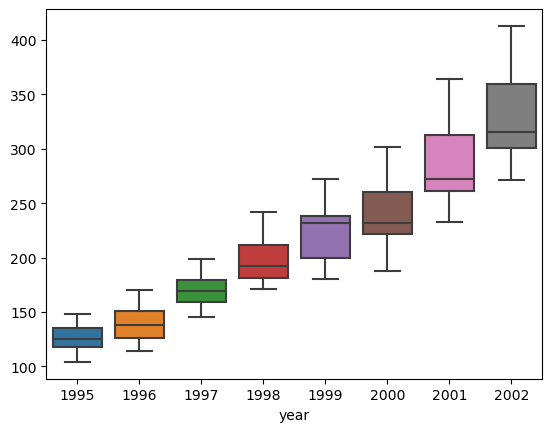

In [31]:
sns.boxplot(df_pivot)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='month', ylabel='Passengers'>

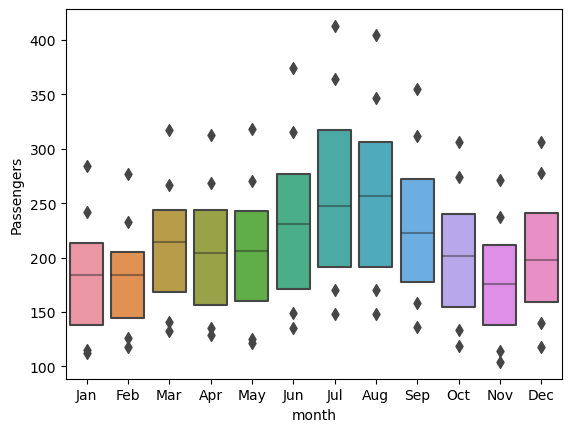

In [59]:
sns.boxenplot(data=df,x='month',y='Passengers')

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='year', ylabel='Passengers'>

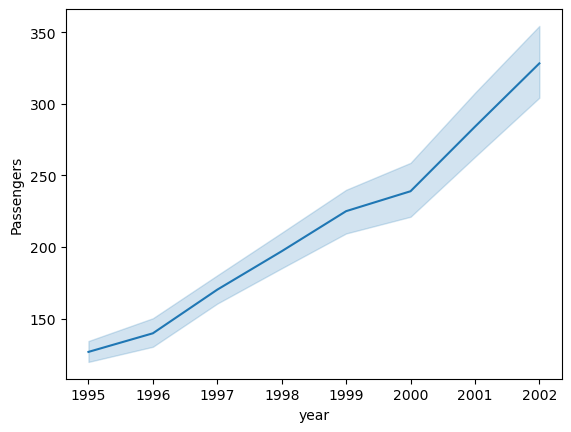

In [60]:
sns.lineplot(x='year',y='Passengers',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='year', ylabel='month'>

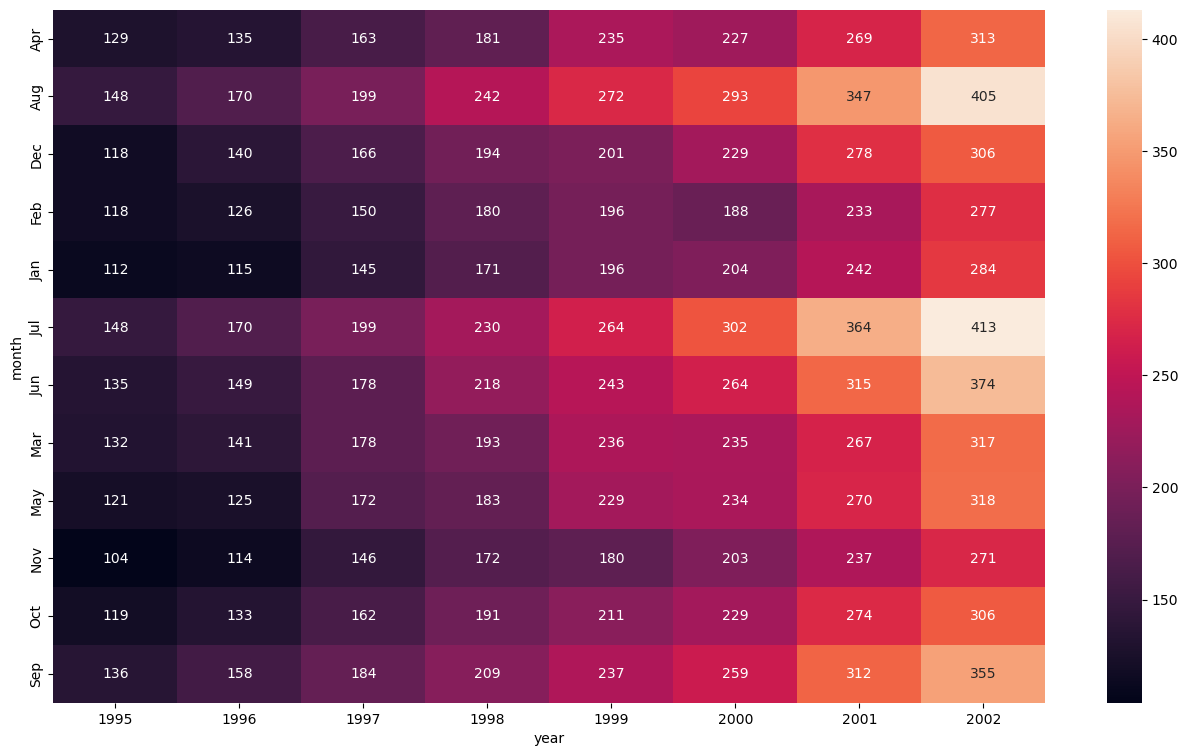

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(df_pivot,annot=True,cmap=None,cbar=True,fmt='0.0f')

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

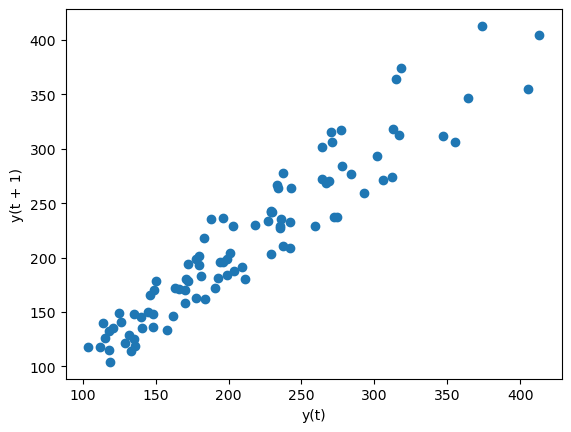

In [43]:
pd.plotting.lag_plot(df.Passengers)

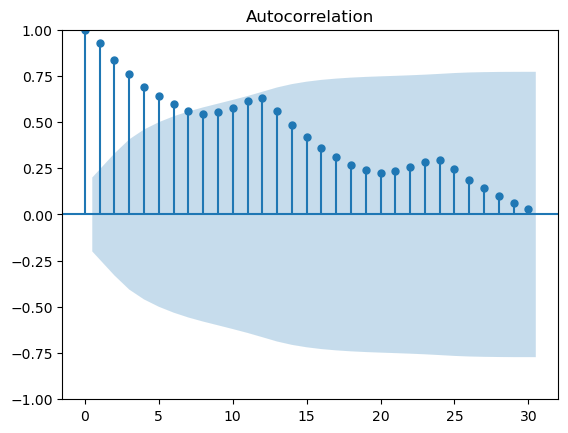

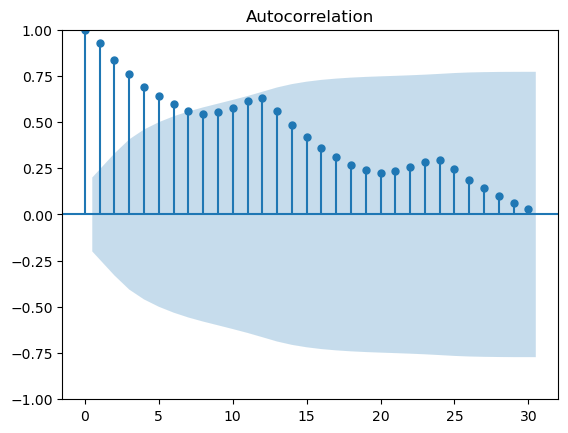

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Passengers,lags=30)

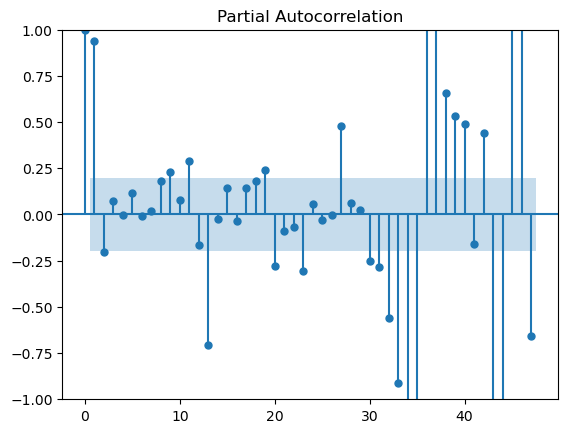

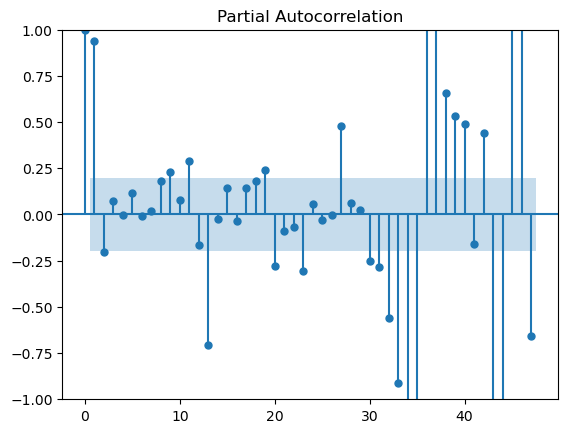

In [58]:
plot_pacf(df.Passengers,lags=47)

# model fitting

In [77]:
import statsmodels.formula.api as smf
df['t'] = range(1,len(df)+1)
df['log_t'] = np.log(df['t'])
df['log_passengers'] = np.log(df['Passengers'])
df['sqr_t'] = (df['t'])**2
train = df.head(80)
test = df.tail(16)
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Month,Passengers,year,month,t,log_t,log_passengers,sqr_t
0,1995-01-01,112,1995,Jan,1,0.000000,4.718499,1
1,1995-02-01,118,1995,Feb,2,0.693147,4.770685,4
2,1995-03-01,132,1995,Mar,3,1.098612,4.882802,9
3,1995-04-01,129,1995,Apr,4,1.386294,4.859812,16
4,1995-05-01,121,1995,May,5,1.609438,4.795791,25
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,92,4.521789,6.003887,8464
92,2002-09-01,355,2002,Sep,93,4.532599,5.872118,8649
93,2002-10-01,306,2002,Oct,94,4.543295,5.723585,8836
94,2002-11-01,271,2002,Nov,95,4.553877,5.602119,9025


In [69]:
# linear model
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear = linear_model.predict(test['t'])
rmse_linear = np.sqrt(np.mean((pred_linear-test['Passengers'])**2))
rmse_linear

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

47.54262406772678

In [79]:
# log 't' model
log_model = smf.ols('Passengers~log_t',data=train).fit()
pred_log = log_model.predict(test['log_t'])
rmse_log = np.sqrt(np.mean((pred_log-test['Passengers'])**2))
rmse_log

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

85.09203370844632

In [83]:
# log 'passengers' model
log_model1 = smf.ols('log_passengers~t',data=train).fit()
pred_log1 = log_model1.predict(test['t'])
rmse_log1 = np.sqrt(np.mean((pred_log1-test['log_passengers'])**2))
rmse_log1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.13540650417934355

In [88]:
# log-log model
loglog_model = smf.ols('log_passengers~log_t',data=train).fit()
pred_loglog = loglog_model.predict(test['log_t'])
rmse_loglog = np.sqrt(np.mean(pred_loglog-test['log_passengers']**2))
rmse_log

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

85.09203370844632

In [89]:
# sqr model
sqr_model = smf.ols('Passengers~sqr_t',data=train).fit()
pred_sqr = sqr_model.predict(test['sqr_t'])
rmse_sqr = np.sqrt(np.mean((pred_sqr-test['Passengers'])**2))
rmse_sqr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

50.33720535489851

In [90]:
# sqr+linear model
lin_sqr_model = smf.ols('Passengers~t+sqr_t',data=train).fit()
pred_lin_sqr = lin_sqr_model.predict(test[['t','sqr_t']])
rmse_lin_sqr = np.sqrt(np.mean((pred_lin_sqr-test['Passengers'])**2))
rmse_lin_sqr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

43.65440369584248

In [116]:
log_model1.rsquared

0.8181204066751708

In [112]:
linear_model.conf_int(0.05)

,0,1
Intercept,93.297752,117.380729
t,1.917289,2.433860


In [92]:
df['pred_linear']=pred_linear
df['pred_log']=pred_log
df['pred_log1']=pred_log1
df['pred_loglog']=pred_loglog
df['pred_sqr']=pred_sqr
df['pred_lin_sqr']=pred_lin_sqr
df.tail(20)

,Month,Passengers,year,month,t,log_t,log_passengers,sqr_t,pred_linear,pred_log,pred_log1,pred_loglog,pred_sqr,pred_lin_sqr
76,2001-05-01,270,2001,May,77,4.343805,5.598422,5929,NaN,NaN,NaN,NaN,NaN,NaN
77,2001-06-01,315,2001,Jun,78,4.356709,5.752573,6084,NaN,NaN,NaN,NaN,NaN,NaN
78,2001-07-01,364,2001,Jul,79,4.369448,5.897154,6241,NaN,NaN,NaN,NaN,NaN,NaN
79,2001-08-01,347,2001,Aug,80,4.382027,5.849325,6400,NaN,NaN,NaN,NaN,NaN,NaN
80,2001-09-01,312,2001,Sep,81,4.394449,5.743003,6561,281.560759,239.720310,5.683652,5.475829,307.153158,294.174684
81,2001-10-01,274,2001,Oct,82,4.406719,5.613128,6724,283.736334,240.303484,5.695030,5.479018,311.377344,297.284623
82,2001-11-01,237,2001,Nov,83,4.418841,5.468060,6889,285.911908,240.879590,5.706407,5.482167,315.653360,300.417351
83,2001-12-01,278,2001,Dec,84,4.430817,5.627621,7056,288.087482,241.448796,5.717784,5.485279,319.981207,303.572869
84,2002-01-01,284,2002,Jan,85,4.442651,5.648974,7225,290.263057,242.011266,5.729161,5.488354,324.360884,306.751176
85,2002-02-01,277,2002,Feb,86,4.454347,5.624018,7396,292.438631,242.567157,5.740539,5.491393,328.792391,309.952273


In [100]:
df_result=pd.DataFrame()
df_result['log_passengers']=df['log_passengers']
df_result['pred_log1']=df['pred_log1']
df_result['diff'] = np.abs(df_result['log_passengers']-df_result['pred_log1'])
df_result.tail(20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,log_passengers,pred_log1,diff
76,5.598422,NaN,NaN
77,5.752573,NaN,NaN
78,5.897154,NaN,NaN
79,5.849325,NaN,NaN
80,5.743003,5.683652,0.059351
81,5.613128,5.695030,0.081902
82,5.468060,5.706407,0.238347
83,5.627621,5.717784,0.090163
84,5.648974,5.729161,0.080187
85,5.624018,5.740539,0.116521


### As data is not stationary, instead of making data stationary, I am not applying ARIMA model

###  Forecasting model fitting

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt # Holts (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing 

In [138]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [139]:
train = df.head(80)
test = df.tail(16)

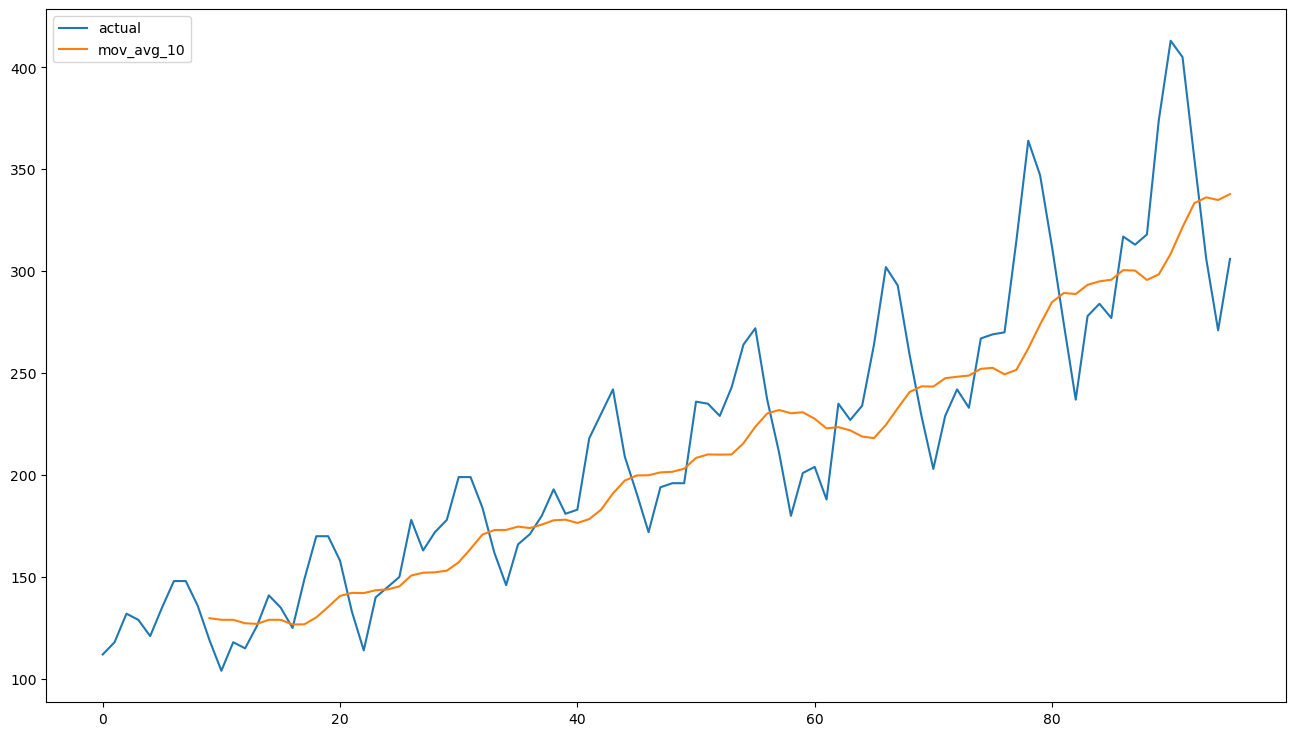

In [142]:
plt.figure(figsize=(16,9))
df['Passengers'].plot(label='actual')
df['Passengers'].rolling(10).mean().plot(label='mov_avg_10')
plt.legend(loc='upper left')

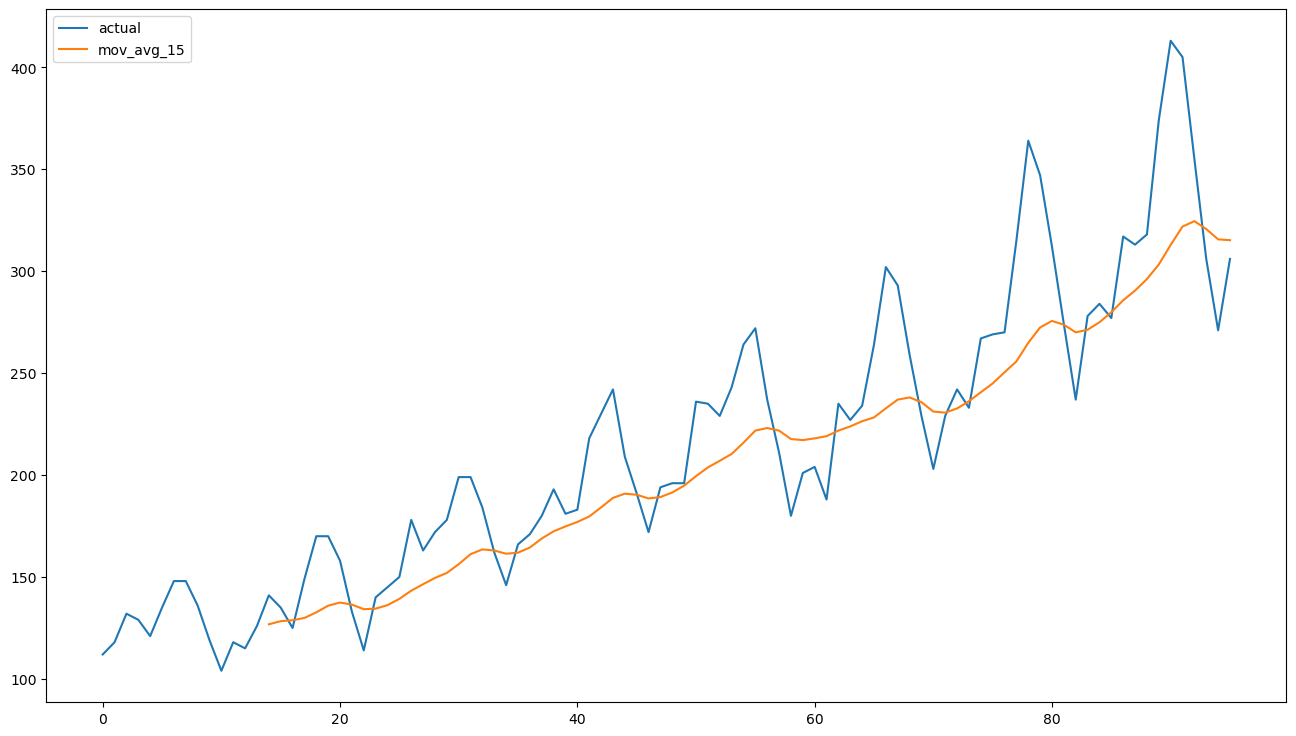

In [143]:
plt.figure(figsize=(16,9))
df['Passengers'].plot(label='actual')
df['Passengers'].rolling(15).mean().plot(label='mov_avg_15')
plt.legend(loc='upper left')

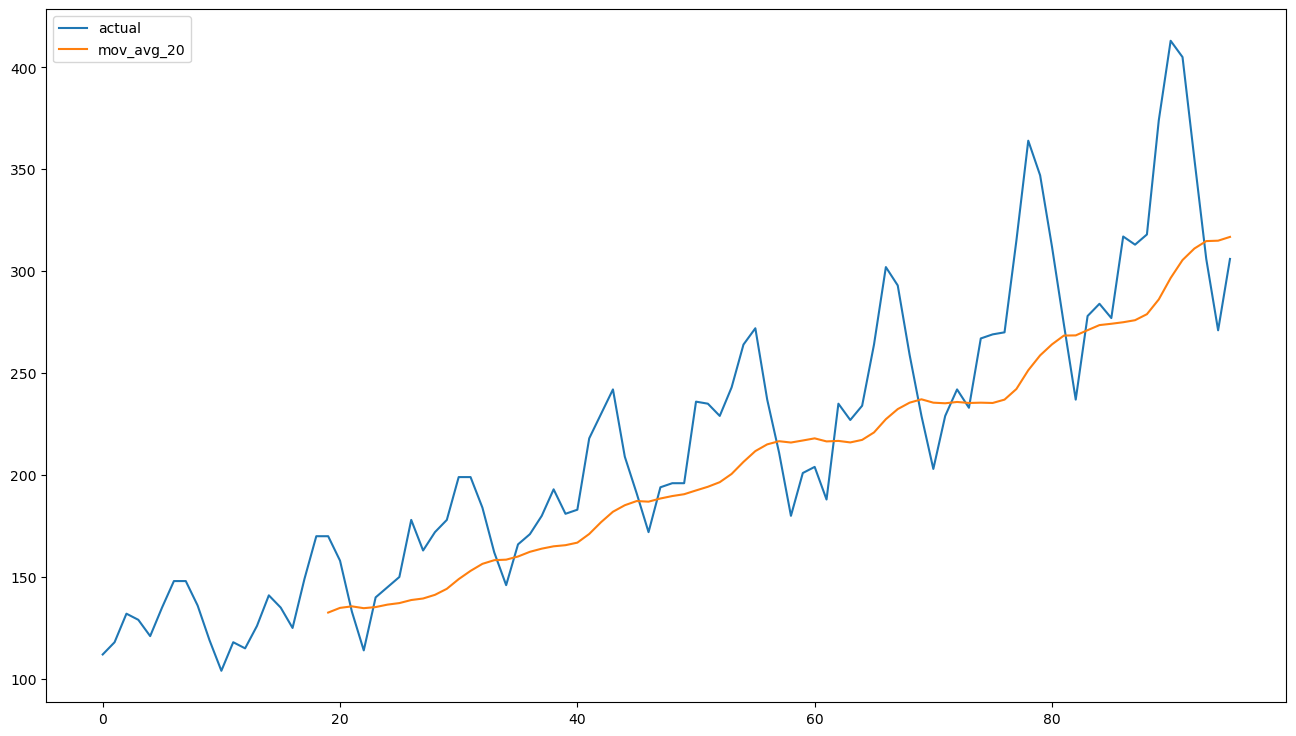

In [144]:
plt.figure(figsize=(16,9))
df['Passengers'].plot(label='actual')
df['Passengers'].rolling(20).mean().plot(label='mov_avg_20')
plt.legend(loc='upper left')

# time series decomposition plot

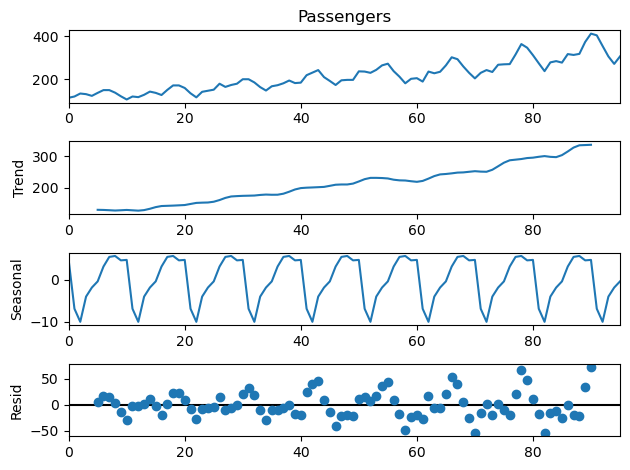

In [149]:
ts_decom = seasonal_decompose(df['Passengers'],period=10).plot()

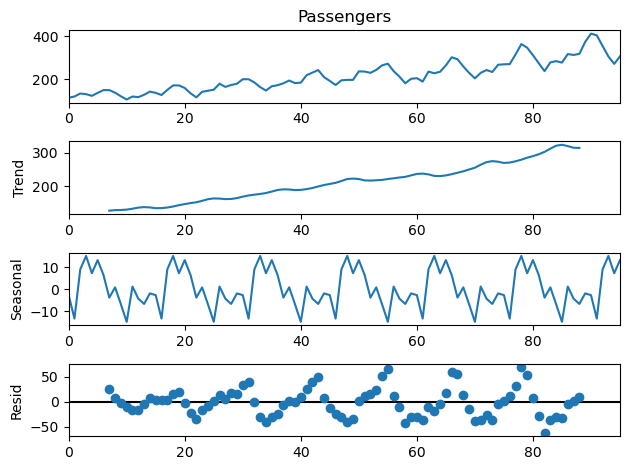

In [150]:
ts_decom = seasonal_decompose(df['Passengers'],period=15).plot()

In [154]:
def mape(pred,org):
    result = np.mean(np.abs(pred-org)/org)*100
    return result
    

In [155]:
mape(100,50)

100.0

In [156]:
sim_exp = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.85)
sim_exp_pred = sim_exp.predict(start=test.index[0],end=test.index[-1])
mape(sim_exp_pred,test['Passengers'])

17.790076912848843

In [159]:
holt_model = Holt(train['Passengers']).fit(smoothing_level=0.85,smoothing_trend=0.2)
holt_pred = holt_model.predict(start=test.index[0],end=test.index[-1])
mape(holt_pred,test['Passengers'])

50.67250179716939

In [165]:
exp_smooth_add = ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit()
exp_smooth_pred_add = exp_smooth_add.predict(start=test.index[0],end=test.index[-1])
mape(exp_smooth_pred_add,test['Passengers'])

7.949424050264893

In [166]:
exp_smooth_mul = ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit()
exp_smooth_pred_mul = exp_smooth_mul.predict(start=test.index[0],end=test.index[-1])
mape(exp_smooth_pred_mul,test['Passengers'])

3.2180043767082425

# exponential smoothing with multiplicative seasonality and additive trend resulted in least percentage error i.e. 3.21%